# Classification by Random Forests
- dataset: Wholesale Customers https://archive.ics.uci.edu/ml/datasets/wholesale+customers

In [1]:
# Clear data in environment
rm(list = ls()) 
graphics.off()
# Read dataset directly from UCI repository
url_path <- paste0("https://archive.ics.uci.edu/ml/machine-learning-databases/",
                   "00292/Wholesale%20customers%20data.csv")
wholesale <- read.csv(url_path, sep = ",")
rm(url_path)

## Label categorical variables

In [2]:
wholesale$Region <- factor(wholesale$Region, levels = 1:3,
                           labels = c("Lisbon", "Porto", "Other"))
wholesale$Channel <- factor(wholesale$Channel, levels = 1:2,
                            labels = c("Horeca", "Retail"))

## Load libraries

In [18]:
library(caret) # use of algorithm and its evaluation
library(rpart)# Random Forest
library(pROC) # ROC curves
library(dplyr) # Data manipulation
library(rpart.plot)

## Explore the dataset

In [4]:
head(wholesale) # First Rows
dim(wholesale) # Dimension dataset
str(wholesale) # dataset structure
sapply(wholesale,class) # Class of all variables
levels(wholesale$Channel) # List of categorical variable values
levels(wholesale$Region)
# View(wholesale) # View the dataset in tabular format
summary(wholesale) # View general summary of existing variables in the dataset
summary(wholesale[, 3: ncol(wholesale)]) # Summary on multiple continuous variables

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>
1,Retail,Other,12669,9656,7561,214,2674,1338
2,Retail,Other,7057,9810,9568,1762,3293,1776
3,Retail,Other,6353,8808,7684,2405,3516,7844
4,Horeca,Other,13265,1196,4221,6404,507,1788
5,Retail,Other,22615,5410,7198,3915,1777,5185
6,Retail,Other,9413,8259,5126,666,1795,1451


[1] 440   8

'data.frame':	440 obs. of  8 variables:
 $ Channel         : Factor w/ 2 levels "Horeca","Retail": 2 2 2 1 2 2 2 2 1 2 ...
 $ Region          : Factor w/ 3 levels "Lisbon","Porto",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Fresh           : int  12669 7057 6353 13265 22615 9413 12126 7579 5963 6006 ...
 $ Milk            : int  9656 9810 8808 1196 5410 8259 3199 4956 3648 11093 ...
 $ Grocery         : int  7561 9568 7684 4221 7198 5126 6975 9426 6192 18881 ...
 $ Frozen          : int  214 1762 2405 6404 3915 666 480 1669 425 1159 ...
 $ Detergents_Paper: int  2674 3293 3516 507 1777 1795 3140 3321 1716 7425 ...
 $ Delicassen      : int  1338 1776 7844 1788 5185 1451 545 2566 750 2098 ...


Channel           Region            Fresh             Milk 
        "factor"         "factor"        "integer"        "integer" 
         Grocery           Frozen Detergents_Paper       Delicassen 
       "integer"        "integer"        "integer"        "integer"

[1] "Horeca" "Retail"

[1] "Lisbon" "Porto"  "Other"

   Channel       Region        Fresh             Milk          Grocery     
 Horeca:298   Lisbon: 77   Min.   :     3   Min.   :   55   Min.   :    3  
 Retail:142   Porto : 47   1st Qu.:  3128   1st Qu.: 1533   1st Qu.: 2153  
              Other :316   Median :  8504   Median : 3627   Median : 4756  
                           Mean   : 12000   Mean   : 5796   Mean   : 7951  
                           3rd Qu.: 16934   3rd Qu.: 7190   3rd Qu.:10656  
                           Max.   :112151   Max.   :73498   Max.   :92780  
     Frozen        Detergents_Paper    Delicassen     
 Min.   :   25.0   Min.   :    3.0   Min.   :    3.0  
 1st Qu.:  742.2   1st Qu.:  256.8   1st Qu.:  408.2  
 Median : 1526.0   Median :  816.5   Median :  965.5  
 Mean   : 3071.9   Mean   : 2881.5   Mean   : 1524.9  
 3rd Qu.: 3554.2   3rd Qu.: 3922.0   3rd Qu.: 1820.2  
 Max.   :60869.0   Max.   :40827.0   Max.   :47943.0  

     Fresh             Milk          Grocery          Frozen       
 Min.   :     3   Min.   :   55   Min.   :    3   Min.   :   25.0  
 1st Qu.:  3128   1st Qu.: 1533   1st Qu.: 2153   1st Qu.:  742.2  
 Median :  8504   Median : 3627   Median : 4756   Median : 1526.0  
 Mean   : 12000   Mean   : 5796   Mean   : 7951   Mean   : 3071.9  
 3rd Qu.: 16934   3rd Qu.: 7190   3rd Qu.:10656   3rd Qu.: 3554.2  
 Max.   :112151   Max.   :73498   Max.   :92780   Max.   :60869.0  
 Detergents_Paper    Delicassen     
 Min.   :    3.0   Min.   :    3.0  
 1st Qu.:  256.8   1st Qu.:  408.2  
 Median :  816.5   Median :  965.5  
 Mean   : 2881.5   Mean   : 1524.9  
 3rd Qu.: 3922.0   3rd Qu.: 1820.2  
 Max.   :40827.0   Max.   :47943.0  

## Channel & Region frequency count

In [5]:
table(wholesale$Channel)
table(wholesale$Region)
summary(wholesale[, c('Channel','Region')])


Horeca Retail 
   298    142 


Lisbon  Porto  Other 
    77     47    316 

   Channel       Region   
 Horeca:298   Lisbon: 77  
 Retail:142   Porto : 47  
              Other :316  

## Missing values

In [6]:
any(is.na(wholesale))

[1] FALSE

## Frequencies and distributions

In [7]:
cbind( Frequency = table( wholesale$Channel),
       Proportion = round(prop.table(table(wholesale$Channel)),2))
# Table of percentage frequencies
round(prop.table(table(wholesale$Channel))*100,2)
round(prop.table(table(wholesale$Region))*100,2)
# Combine frequency and percentage tables
cbind(frequency = table(wholesale$Channel),
      percentage = round(prop.table(table(wholesale$Channel))*100,2))
cbind(frequency = table(wholesale$Region),
      percentage = round(prop.table(table(wholesale$Region))*100,2))
# Cross frequency tables
table(wholesale$Region, wholesale$Channel)
# Crossover percentages of the two tables (overall)
round(prop.table(table(wholesale$Region, wholesale$Channel))*100,2)
#Percentage by columns
round(prop.table(table(wholesale$Region, wholesale$Channel), margin = 2)*100,2)
# Percent per lines
round(prop.table(table(wholesale$Region, wholesale$Channel), margin = 1)*100,2)
# Combine frequencies and percentages
cbind(table(wholesale$Region, wholesale$Channel),
     round( prop.table(table(wholesale$Region, wholesale$Channel), margin = 1)*100,2))

,Frequency,Proportion
Horeca,298,0.68
Retail,142,0.32



Horeca Retail 
 67.73  32.27 


Lisbon  Porto  Other 
 17.50  10.68  71.82 

,frequency,percentage
Horeca,298,67.73
Retail,142,32.27


,frequency,percentage
Lisbon,77,17.50
Porto,47,10.68
Other,316,71.82


        
         Horeca Retail
  Lisbon     59     18
  Porto      28     19
  Other     211    105

        
         Horeca Retail
  Lisbon  13.41   4.09
  Porto    6.36   4.32
  Other   47.95  23.86

        
         Horeca Retail
  Lisbon  19.80  12.68
  Porto    9.40  13.38
  Other   70.81  73.94

        
         Horeca Retail
  Lisbon  76.62  23.38
  Porto   59.57  40.43
  Other   66.77  33.23

,Horeca,Retail,Horeca,Retail
Lisbon,59,18,76.62,23.38
Porto,28,19,59.57,40.43
Other,211,105,66.77,33.23


## Totals

In [8]:
# Total spend by category grouped by Channel
wholesale %>% 
  group_by(Channel) %>% 
  summarise(across(2:last_col(), sum))
# Total Average Spend % by Category Grouped by Channel
wholesale %>% 
  group_by(Channel) %>% 
  summarise(across(2:last_col(), mean)) %>% 
  mutate(across(2:last_col(), ~ scales::percent(./sum(.))))
# Total global spend  by Chanel
wholesale %>% 
  group_by(Channel) %>% 
  summarise(Total = sum(across(2:last_col()))) %>% 
  mutate(Total_Per = Total/sum(Total)*100)

Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
<fct>,<int>,<int>,<int>,<int>,<int>,<int>
Horeca,4015717,1028614,1180717,1116979,235587,421955
Retail,1264414,1521743,2317845,234671,1032270,248988


Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Horeca,60%,24%,20%,69%,10%,45%
Retail,40%,76%,80%,31%,90%,55%


Channel,Total,Total_Per
<fct>,<int>,<dbl>
Horeca,7999569,54.71849
Retail,6619931,45.28151


## Visualizations

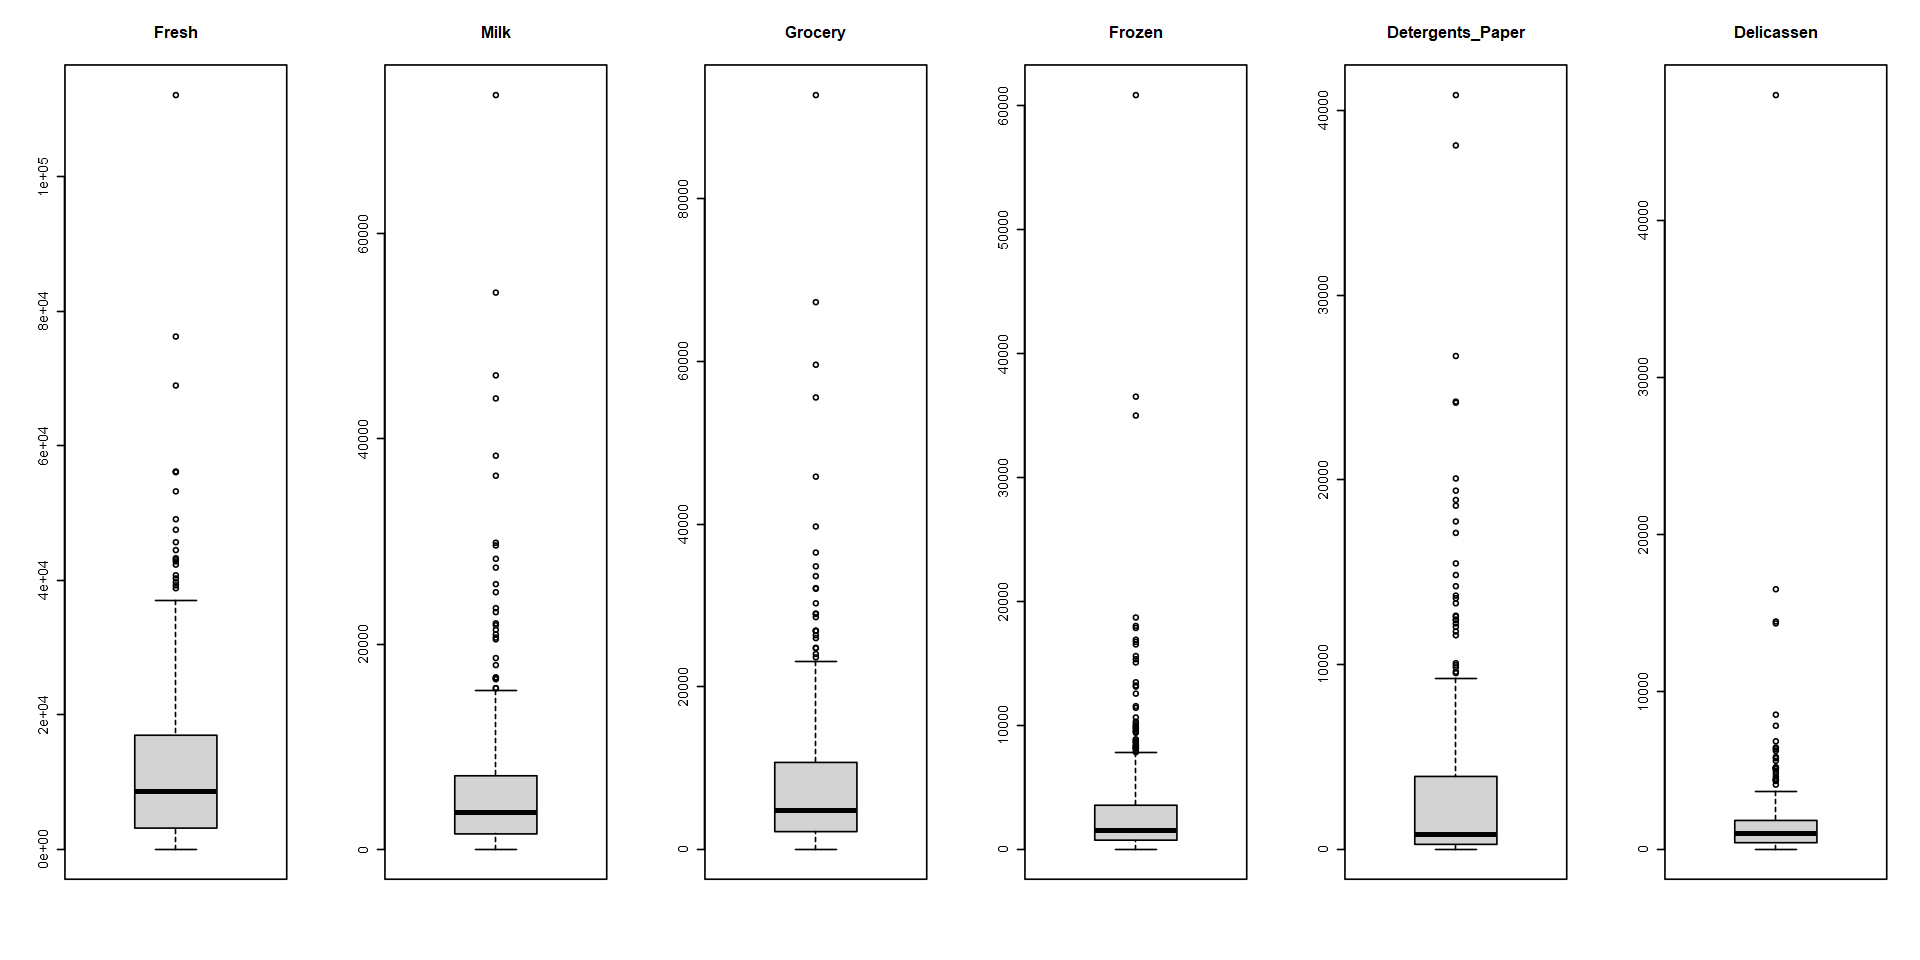

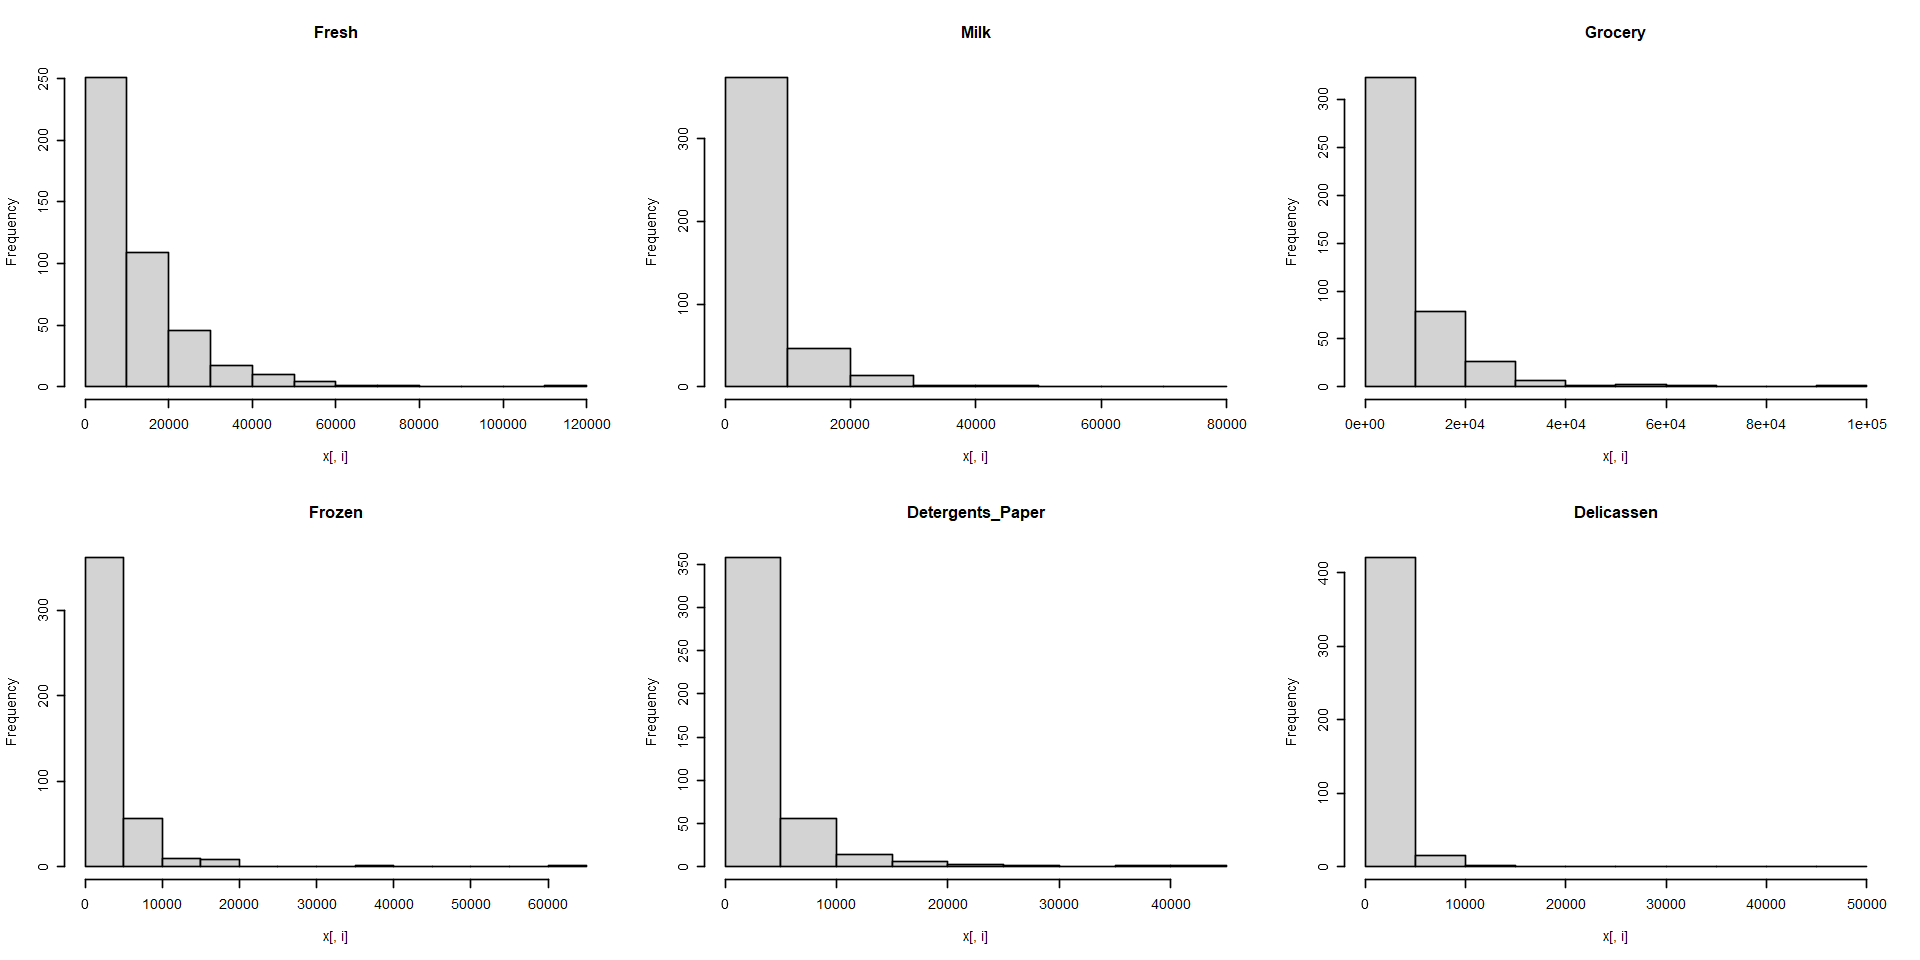

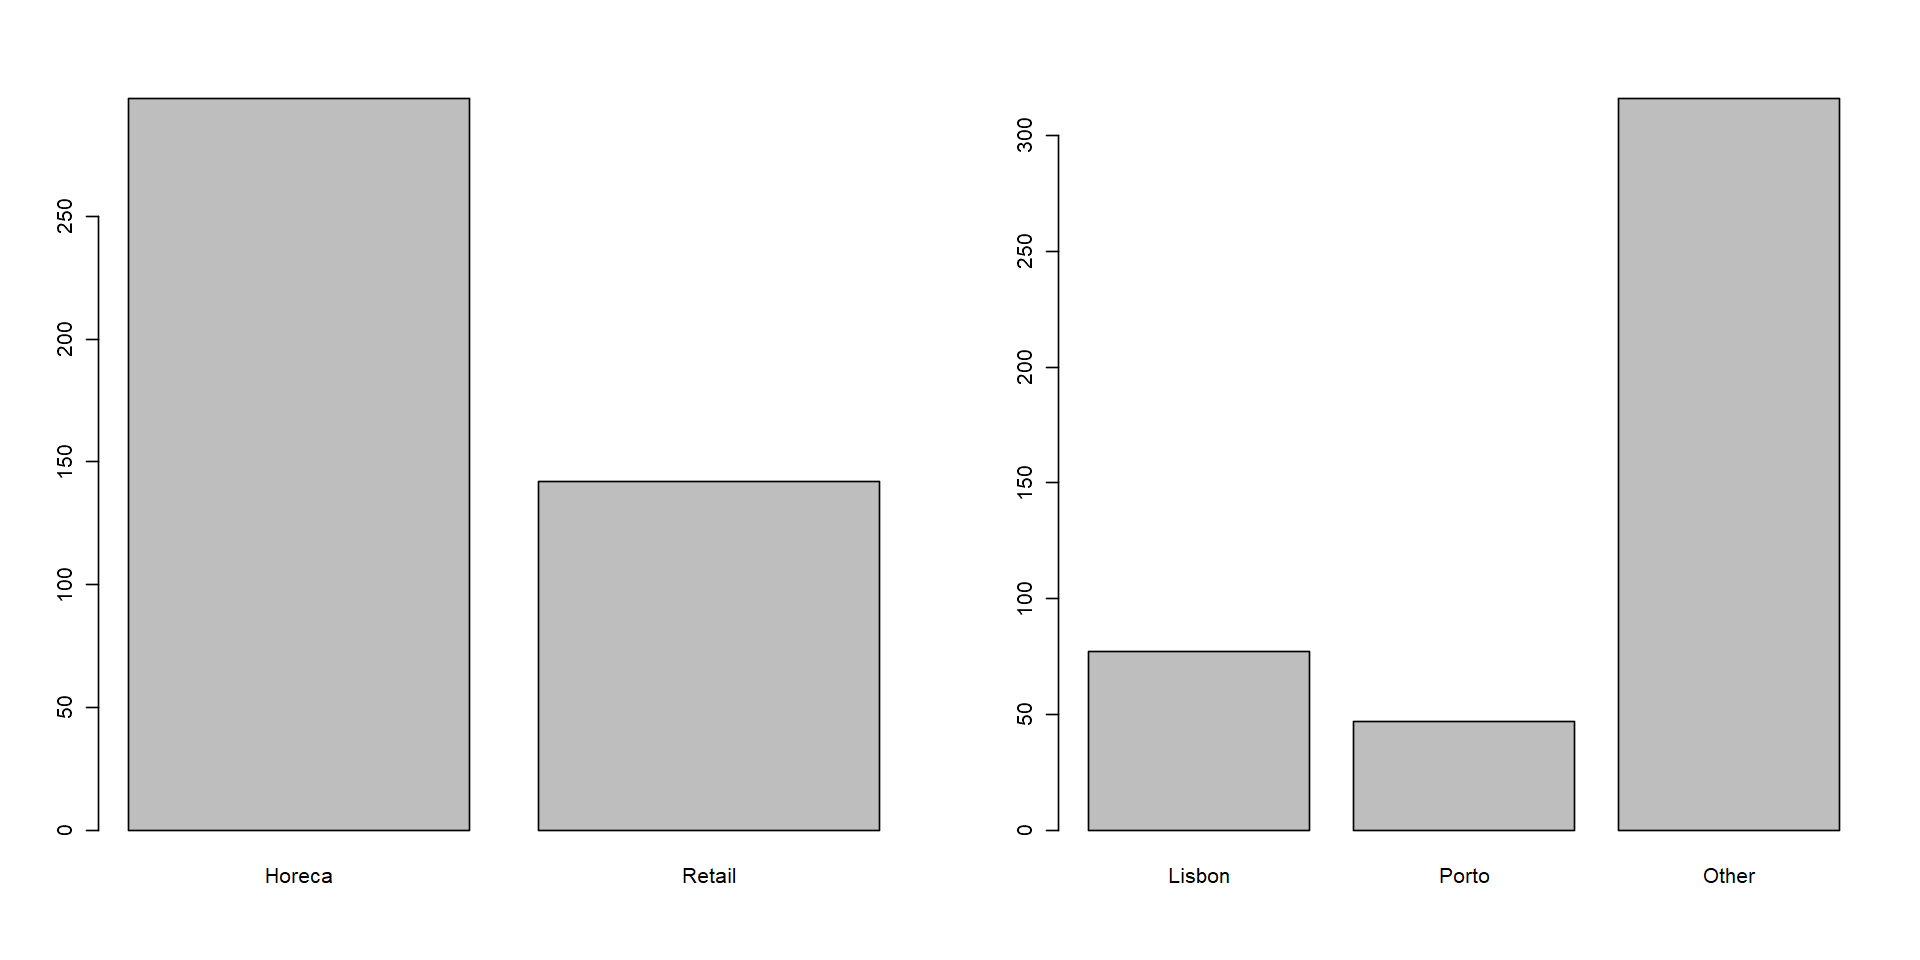

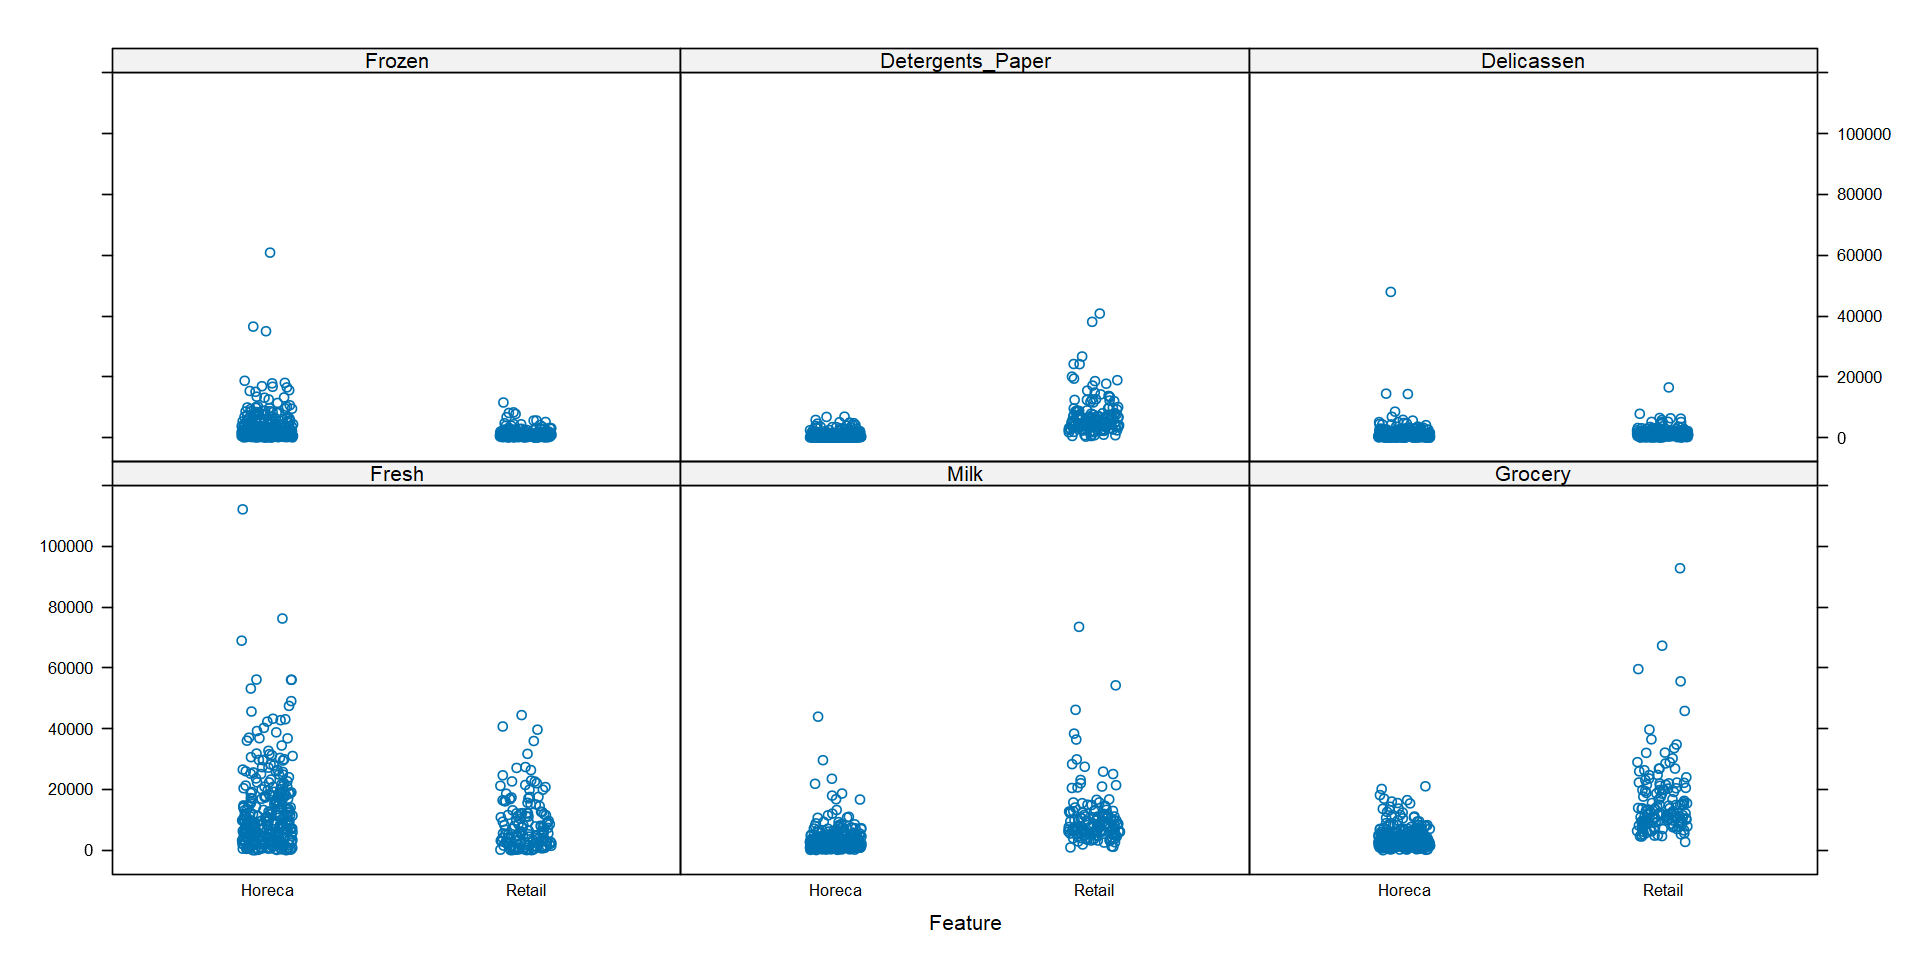

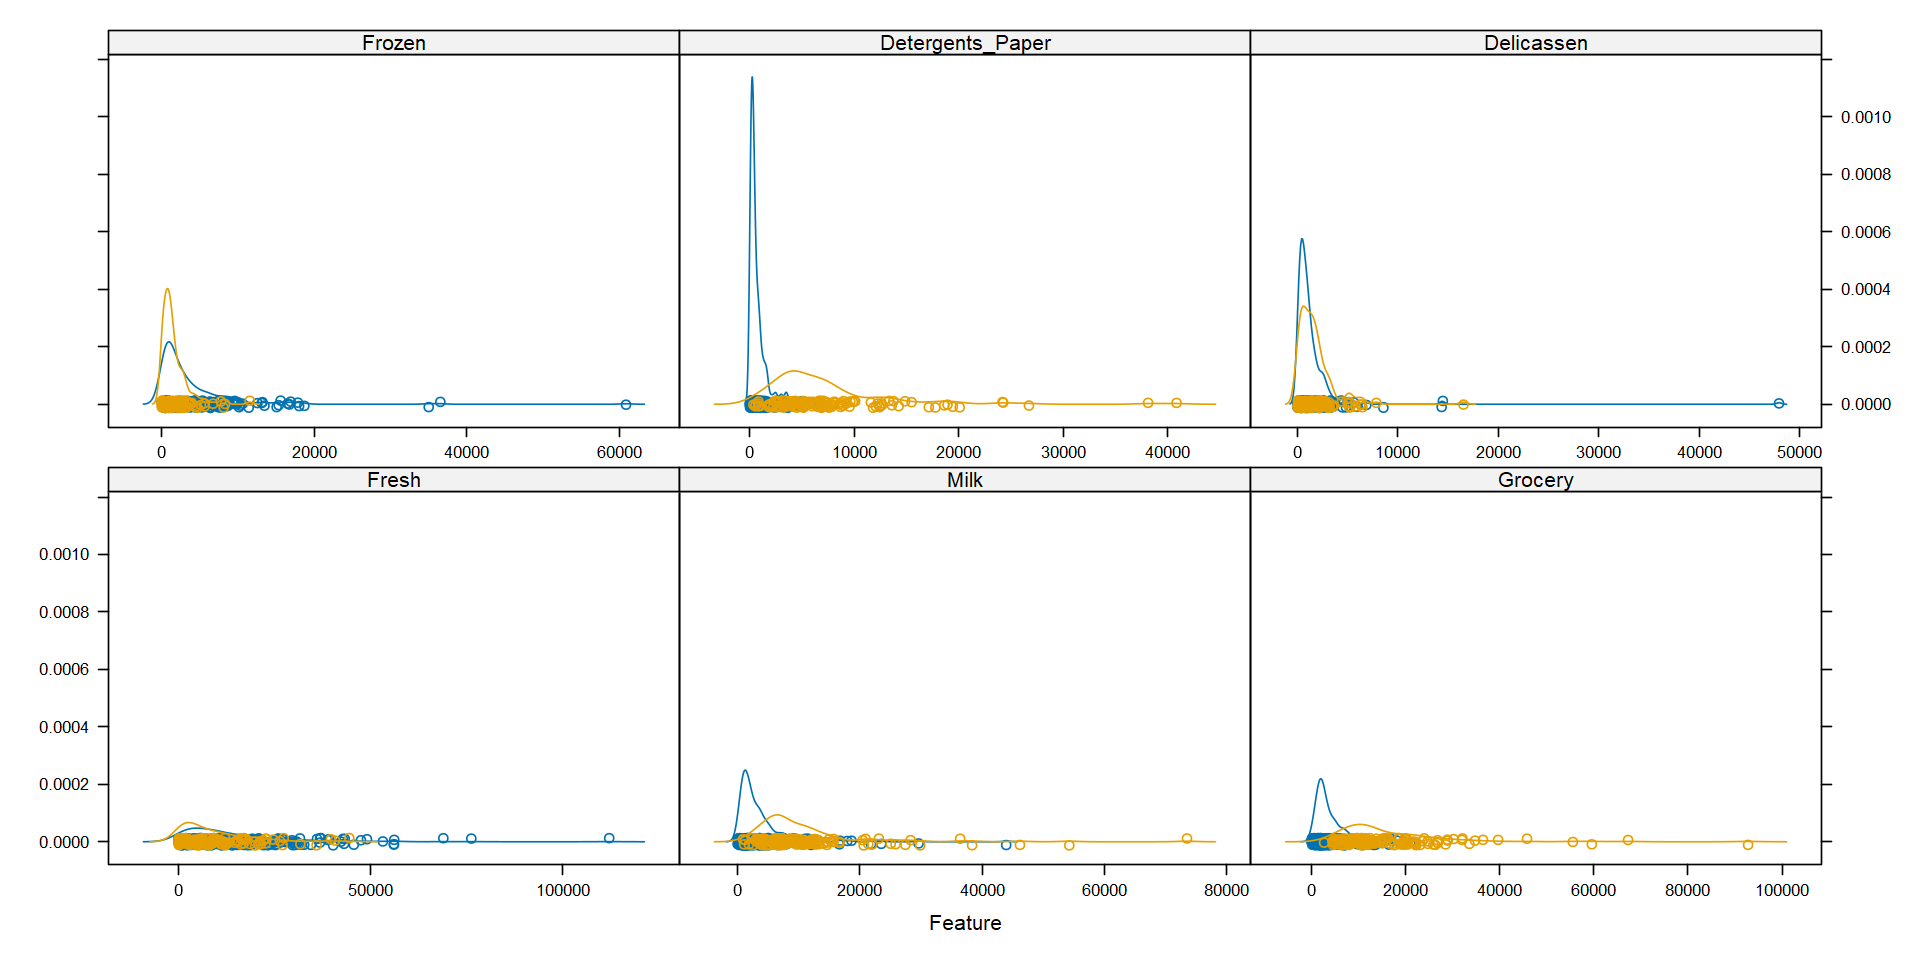

In [9]:
# Define inputs and outputs
x <- wholesale[,3:8]
yc <- wholesale[,1]
yr <- wholesale[,2]
# Boxplot
options(repr.plot.width=16, repr.plot.height=8)
par(mfrow= c(1,6))
  for (i in 1:6) { 
    boxplot(x[,i], main = colnames(x)[i])
  }
# Frequency histograms of continuous variables
par(mfrow= c(2,3))
  for (i in 1:6) { 
    hist(x[,i], main = names(x)[i])
  }
par(mfrow= c(1,2))
# Frequency by Chanel
plot(wholesale$Channel)
# Frequency by Region
plot(wholesale$Region)
# Relationships between variables
featurePlot(x=x, y=yc, plot =  "strip", jitter = TRUE)
# Density of variables
scales <- list(x=list(relation="free"), yc=list(relation="free"))
featurePlot(x=x, y=yc, plot="density", scales=scales)

## Split the full data set in Train and Test sets
### Let's classify customers according to Horeca or Retail categories

In [10]:
# Define training and testing
seed <- 377
set.seed(seed)
train_index <- createDataPartition(wholesale$Channel, p = 0.8, list = FALSE)
train_set <- wholesale[train_index, ]
test_set <- wholesale[-train_index, ]

## Fit Model

In [11]:
# Metric
metric <- "ROC"
# Cross-validation method with different random divisions
control <- trainControl(method = "repeatedcv", 
                        # number of folds
                        number = 5, 
                        # performance metrics (binary ranking)
                        summaryFunction = twoClassSummary, 
                        # probability calculation
                        classProbs = TRUE,
                        # all predictions saved
                        savePredictions = TRUE,
                        # number of times the validation is cross-validated
                        repeats = 3) 

## Train the model(s) in Train set

In [12]:
# Learning with decision tree model (DT)
set.seed(seed)
model_DT <- train(Channel ~ .,
                  data = train_set,
                  method = 'rpart',
                  metric = metric,
                  trControl = control)

In [13]:
# View parameters used (DT)
getModelInfo(model_DT)$rpart$parameters
print(model_DT)

Warning message in grepl(model, names(models), ...):
"argument 'pattern' has length > 1 and only the first element will be used"


parameter,class,label
<chr>,<chr>,<chr>
cp,numeric,Complexity Parameter


CART 

353 samples
  7 predictor
  2 classes: 'Horeca', 'Retail' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 282, 282, 282, 283, 283, 282, ... 
Resampling results across tuning parameters:

  cp          ROC        Sens       Spec     
  0.00877193  0.9099123  0.9302305  0.8417655
  0.03508772  0.9019344  0.9162234  0.8620553
  0.73684211  0.7221281  0.9414894  0.5027668

ROC was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.00877193.


The model (DT) performed better when the roc was 0.909, and the sens and spec were also better compared to the other values. The final model with a parameter of cp = 0.00877193

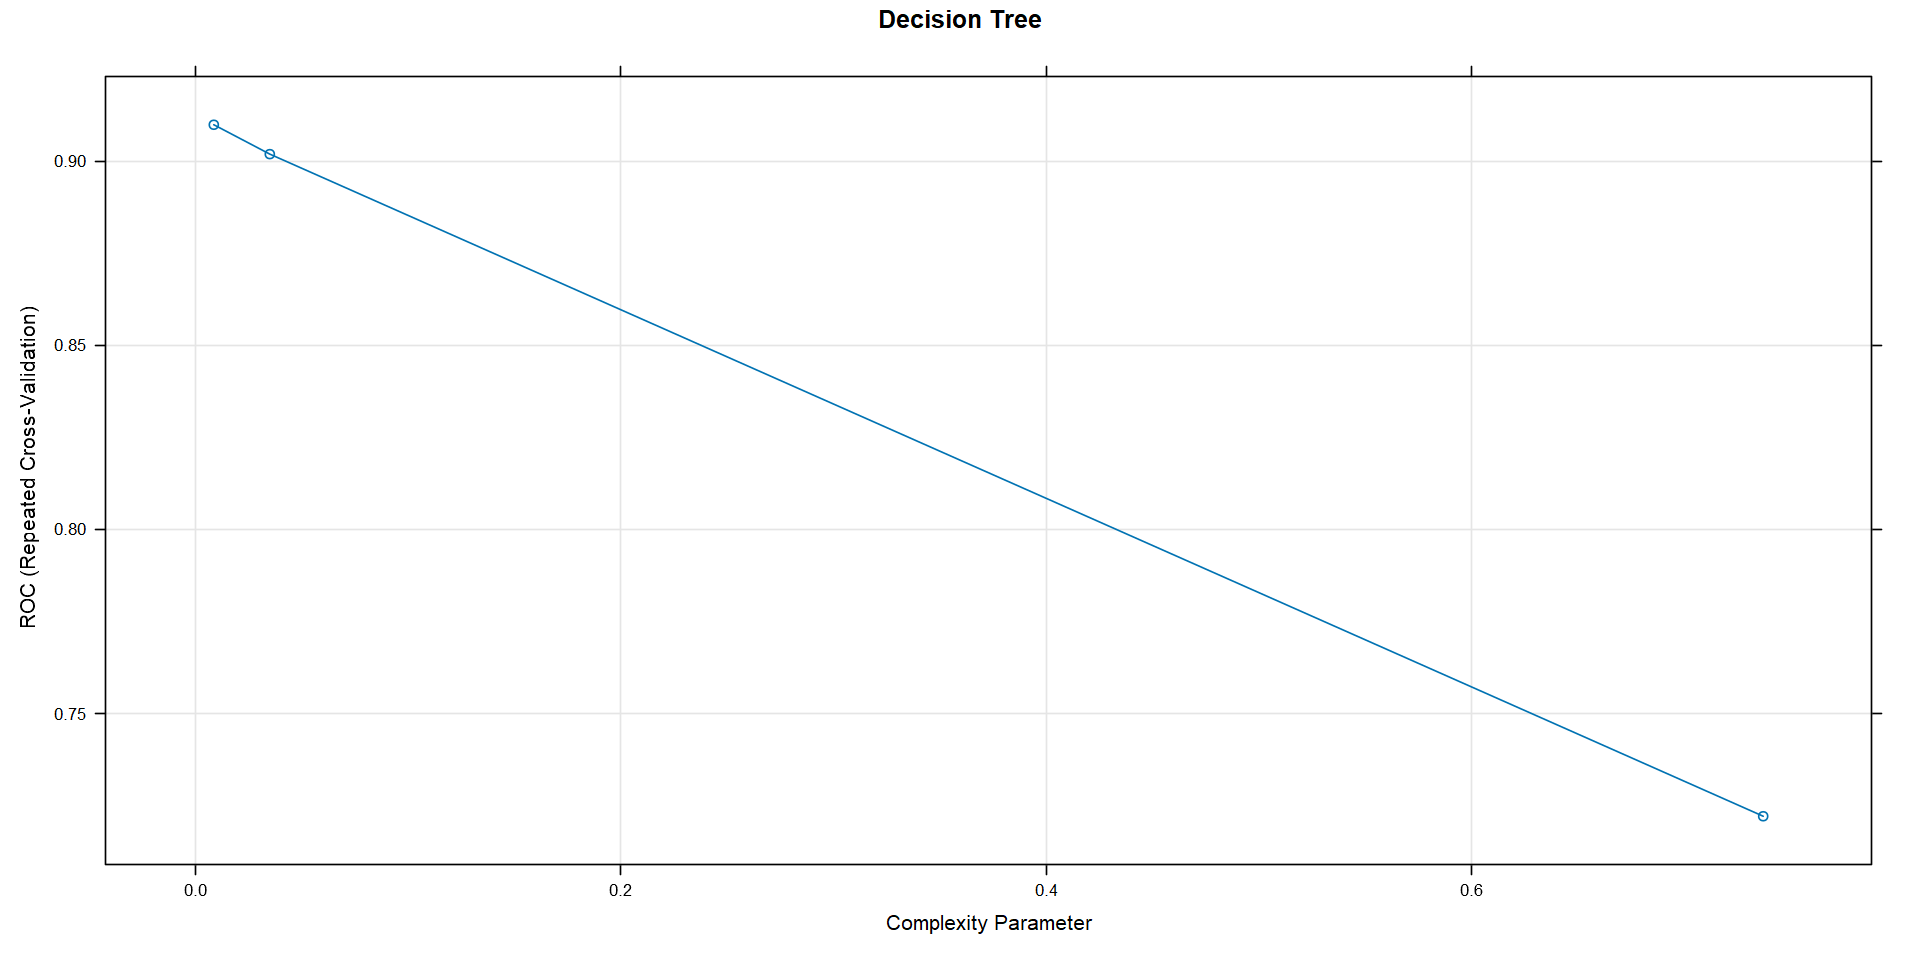

In [14]:
plot(model_DT, main = "Decision Tree")

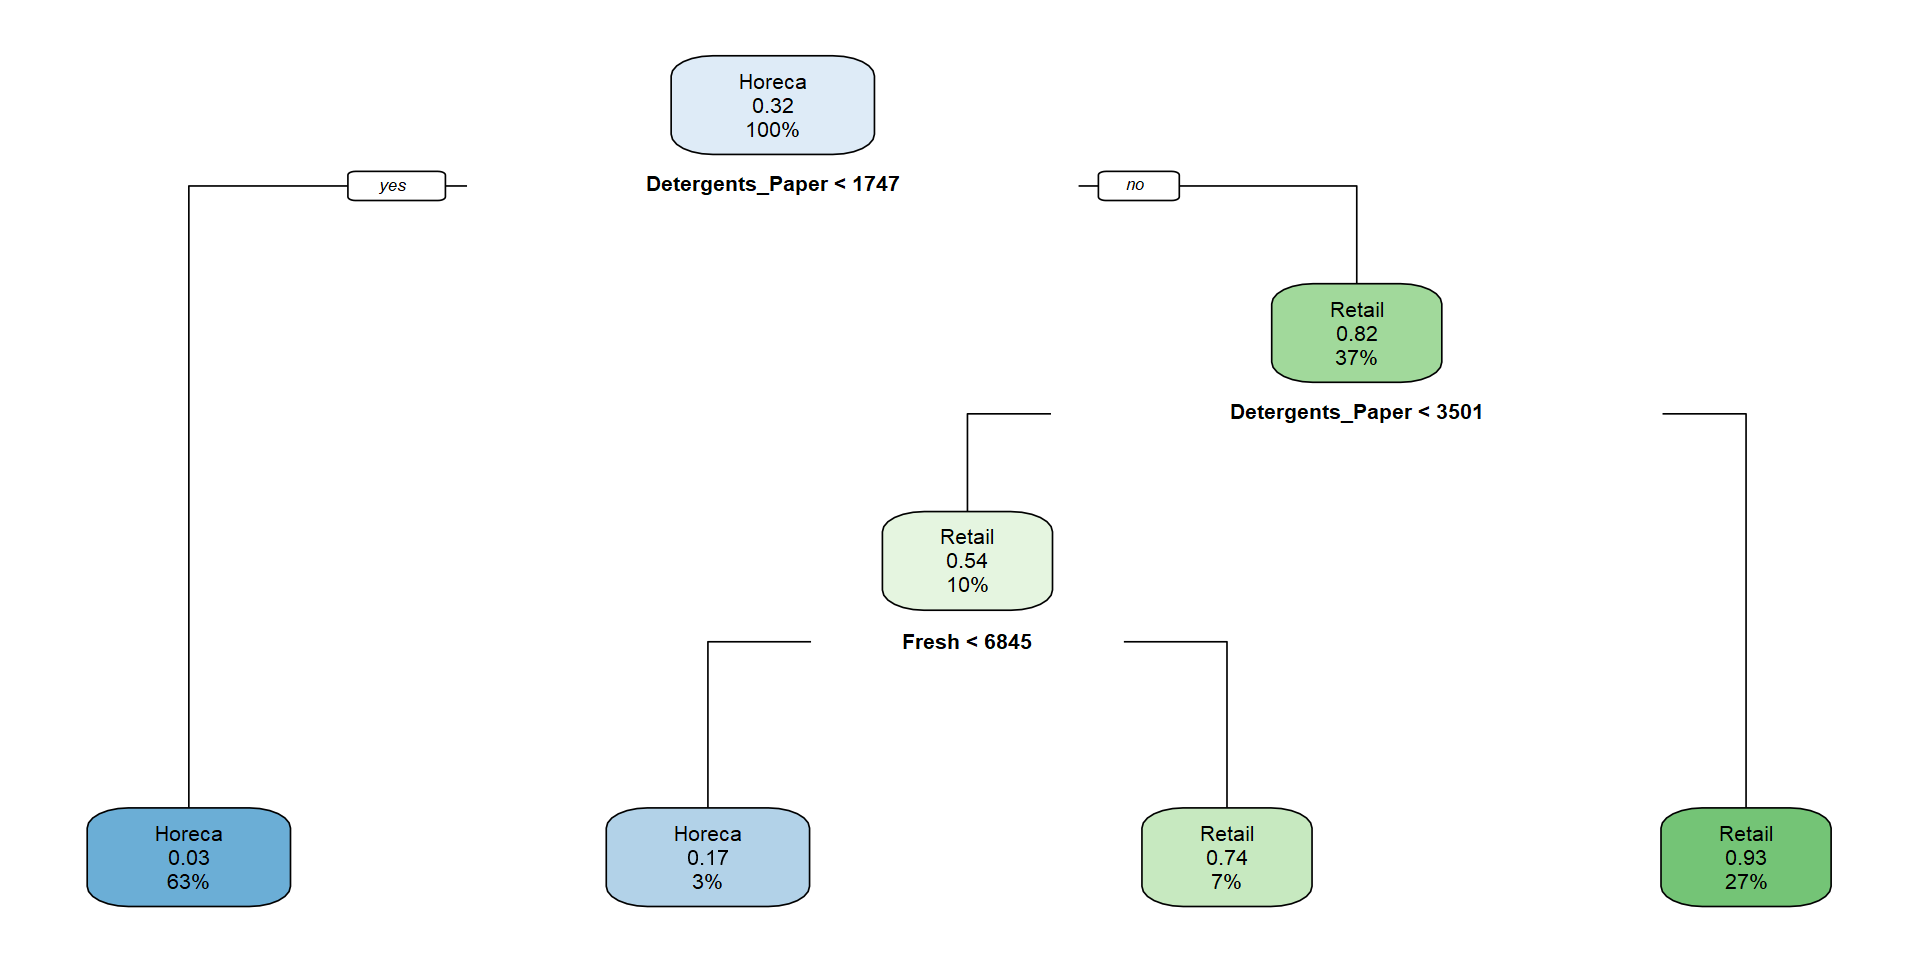

In [20]:
# Advanced visual representation of a model
rpart.plot(model_DT$finalModel)

## Learning with Rondom Forest (RF) model

In [21]:
set.seed(seed)
model_RF <- train(Channel ~ .,
                  data = train_set,
                  method = 'rf',
                  metric = metric,
                  trControl = control)

In [23]:
# View parameters used (RF)
getModelInfo(model_RF)$rf$parameters
print(model_RF)

Warning message in grepl(model, names(models), ...):
"argument 'pattern' has length > 1 and only the first element will be used"


parameter,class,label
<chr>,<chr>,<chr>
mtry,numeric,#Randomly Selected Predictors


Random Forest 

353 samples
  7 predictor
  2 classes: 'Horeca', 'Retail' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 282, 282, 282, 283, 283, 282, ... 
Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
  2     0.9595238  0.9469858  0.8625823
  5     0.9607811  0.9385638  0.8683794
  8     0.9568128  0.9329787  0.8685112

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 5.


The model(RF) performed better when the mtry was 5, with an ROC of 0.960 and the sens and spec were also better compared to the other values. The final model was built with mtry=5

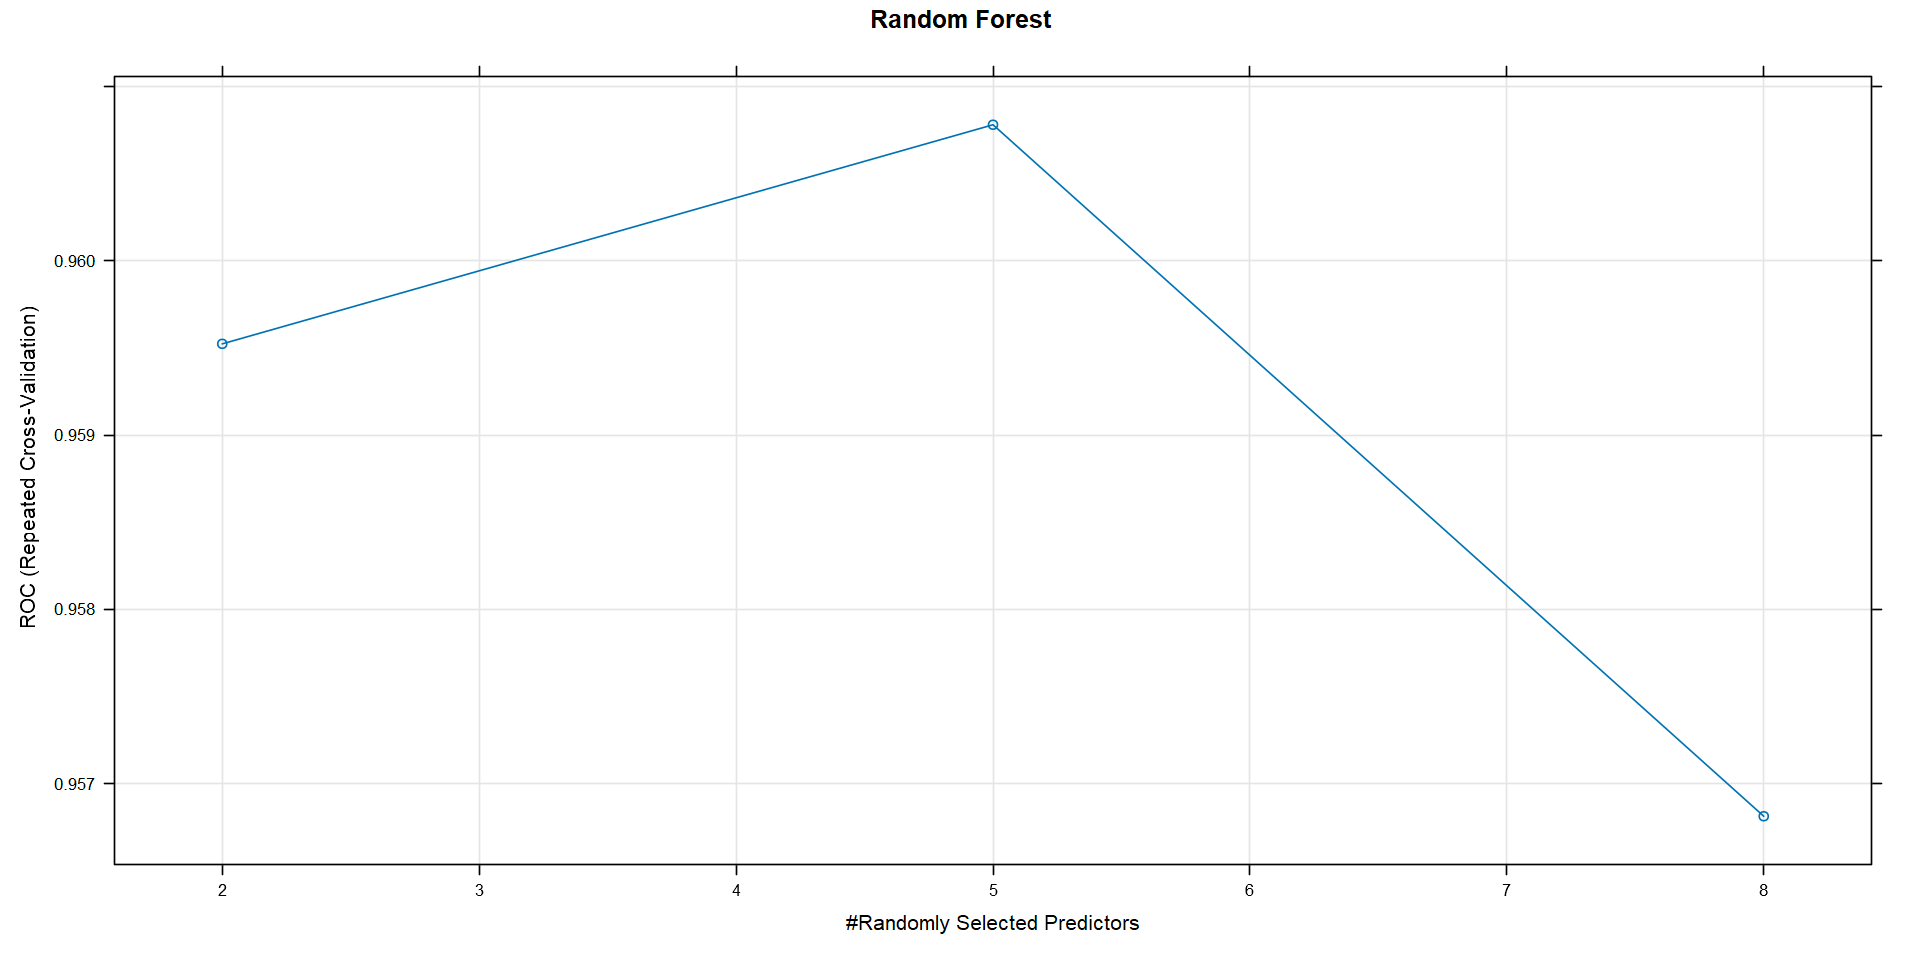

In [24]:
plot(model_RF, main = "Random Forest")

In [25]:
# Improve the model by adjusting the mtry parameter
# create df with all possible combinations
tune_grid <- expand.grid(mtry = 1:8) #
# use the same seed
set.seed(seed)
# train the model
model_rf_tune <- train(Channel ~., 
                       data = train_set,
                       method = "rf",
                       metric = metric,
                       trControl = control,
                       tuneGrid = tune_grid)

Warning message in grepl(model, names(models), ...):
"argument 'pattern' has length > 1 and only the first element will be used"


parameter,class,label
<chr>,<chr>,<chr>
mtry,numeric,#Randomly Selected Predictors


Random Forest 

353 samples
  7 predictor
  2 classes: 'Horeca', 'Retail' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 282, 282, 282, 283, 283, 282, ... 
Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
  1     0.9544984  0.9497931  0.8271410
  2     0.9601506  0.9413712  0.8654809
  3     0.9622734  0.9413416  0.8712780
  4     0.9610355  0.9385638  0.8711462
  5     0.9605709  0.9385638  0.8714097
  6     0.9596954  0.9371749  0.8683794
  7     0.9585854  0.9357861  0.8627141
  8     0.9583795  0.9343381  0.8685112

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 3.


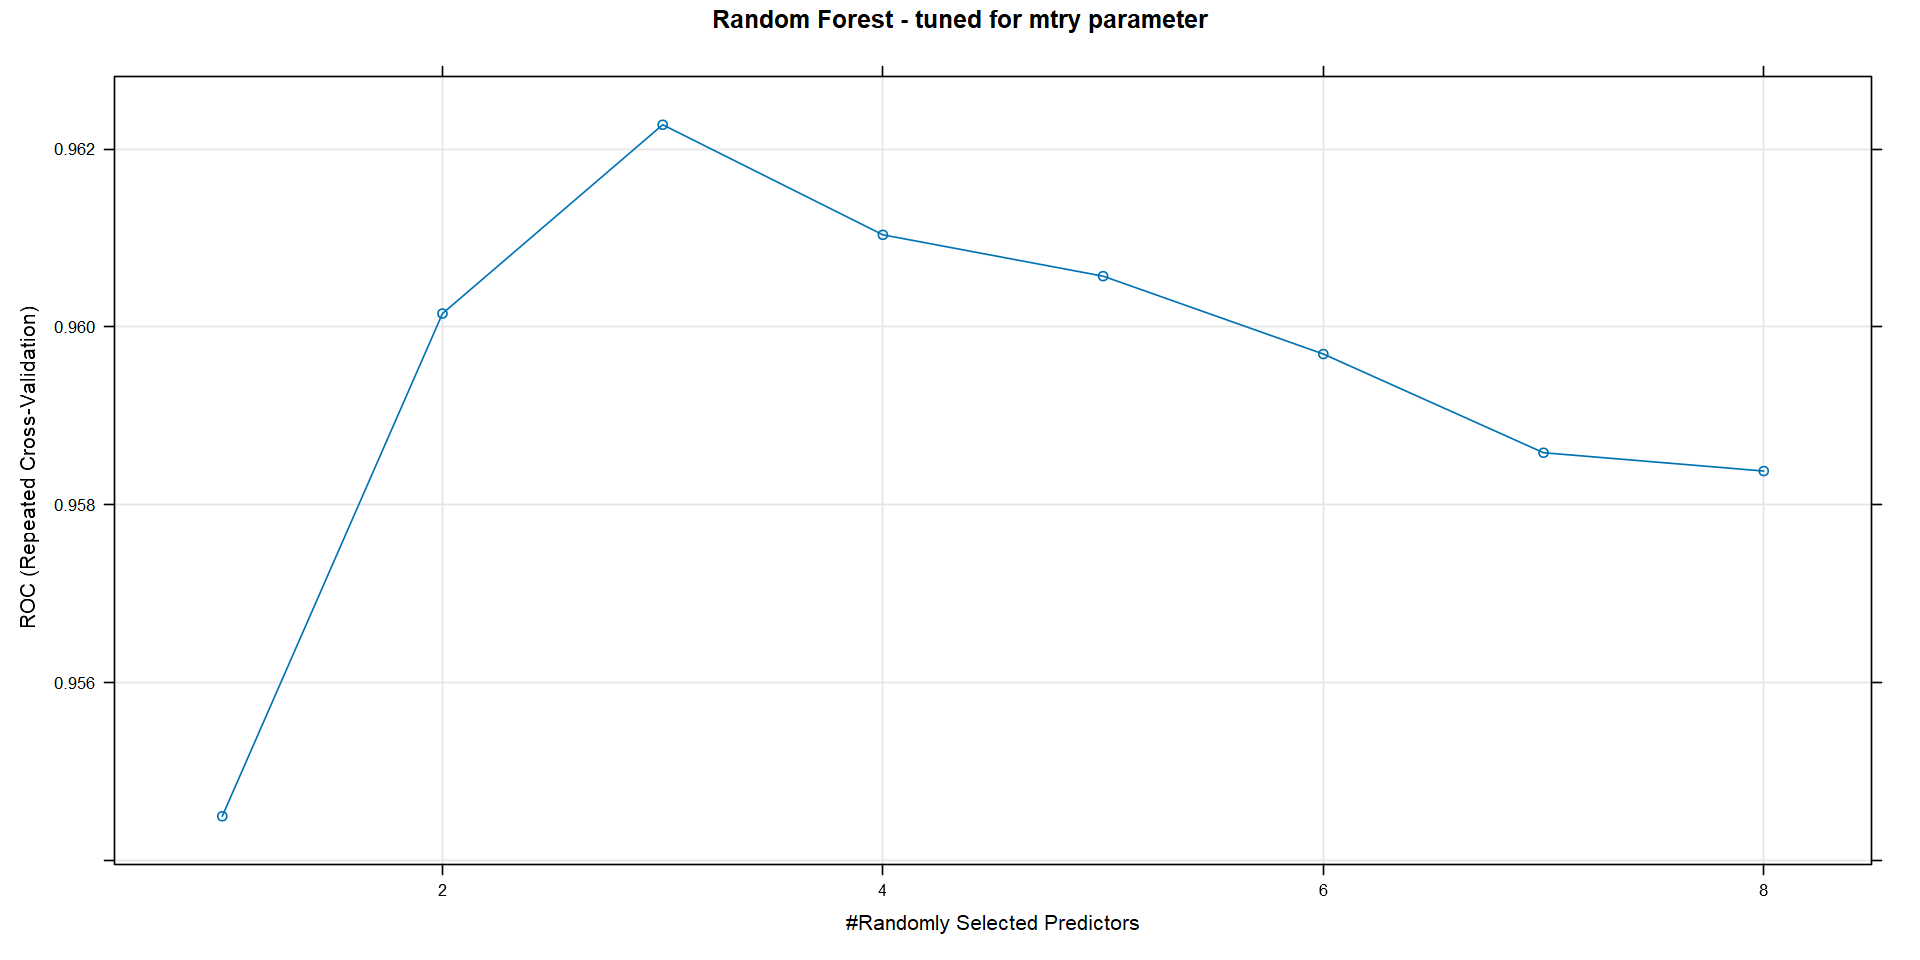

In [27]:
# # View parameters used (rf_tune)
getModelInfo(model_rf_tune)$rf$parameters
plot(model_rf_tune, main = "Random Forest - tuned for mtry parameter")
print(model_rf_tune)

The model(rf_tine) performed best when the mtry was 3, with an ROC of 0.9623 and the sens and spec were also better compared to the other values. The final model was built with mtry=3

## Compare models and calculate performance

In [28]:
fit_models <- list( Decision_tree = model_DT,
                    Random_forest = model_RF, 
                    Random_forest_tuned = model_rf_tune)

results <- resamples(fit_models)
summary(results)


Call:
summary.resamples(object = results)

Models: Decision_tree, Random_forest, Random_forest_tuned 
Number of resamples: 15 

ROC 
                         Min.   1st Qu.    Median      Mean   3rd Qu.      Max.
Decision_tree       0.8025362 0.8911602 0.9294508 0.9099123 0.9510291 0.9741848
Random_forest       0.9266304 0.9498106 0.9588344 0.9607811 0.9734476 0.9954710
Random_forest_tuned 0.9288949 0.9532691 0.9583719 0.9622734 0.9780035 0.9927536
                    NA's
Decision_tree          0
Random_forest          0
Random_forest_tuned    0

Sens 
                        Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
Decision_tree       0.875000 0.9053635 0.9375000 0.9302305 0.9474734    1    0
Random_forest       0.875000 0.9264184 0.9375000 0.9385638 0.9583333    1    0
Random_forest_tuned 0.893617 0.9157801 0.9574468 0.9413416 0.9583333    1    0

Spec 
                         Min.   1st Qu.    Median      Mean   3rd Qu.      Max.
Decision_tree       0.6086957 0.8231

With ROC as a general measure (0.9622734) the Random_forest_tuned model, presents better performance, presents the highest sens, to detect the (TP), as well as the highest spec to identify (TN)

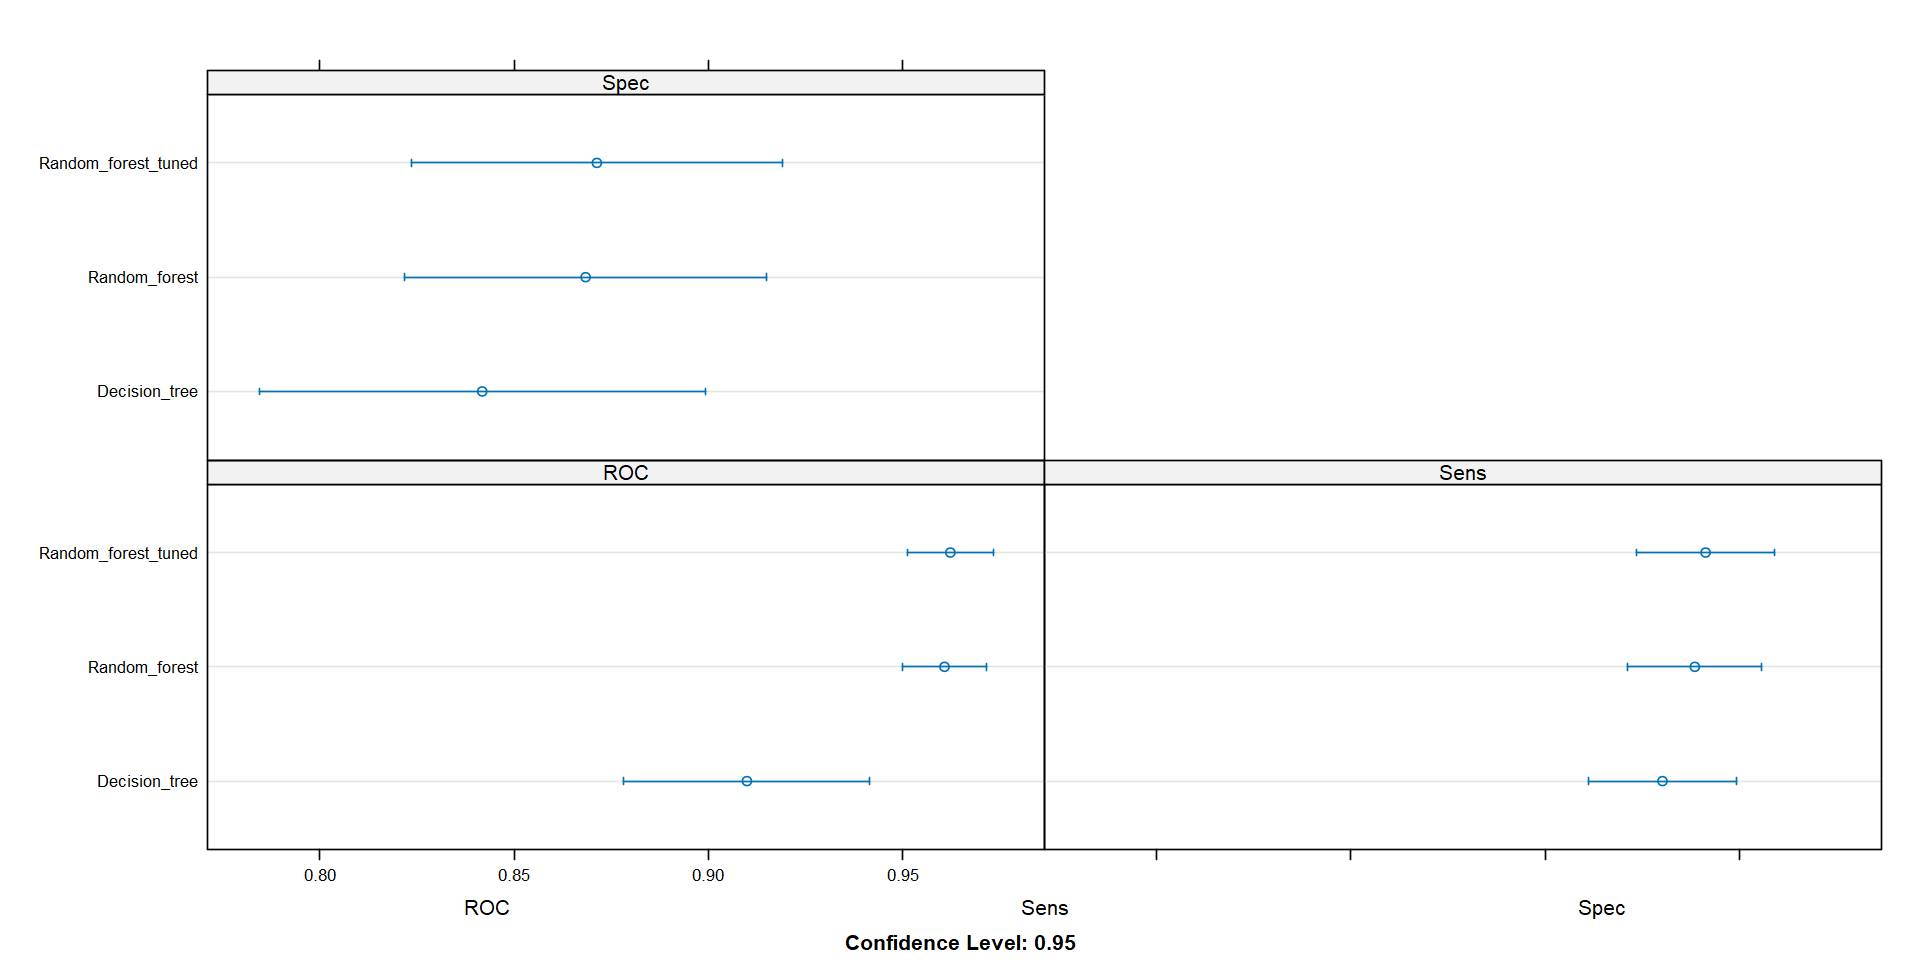

In [31]:
# View results
dotplot(results)

## Curvas ROC dos modelos

Setting levels: control = Horeca, case = Retail

Setting direction: controls < cases

Setting levels: control = Horeca, case = Retail

Setting direction: controls < cases



Setting levels: control = Horeca, case = Retail

Setting direction: controls < cases



$Decision_tree

Call:
plot.roc.default(x = fit$pred$obs, predictor = fit$pred$Retail,     main = paste0(control$repeats, "x ", control$number, "-fold Cross Validation | ",         fit$method), print.auc = TRUE)

Data: fit$pred$Retail in 2151 controls (fit$pred$obs Horeca) < 1026 cases (fit$pred$obs Retail).
Area under the curve: 0.901

$Random_forest

Call:
plot.roc.default(x = fit$pred$obs, predictor = fit$pred$Retail,     main = paste0(control$repeats, "x ", control$number, "-fold Cross Validation | ",         fit$method), print.auc = TRUE)

Data: fit$pred$Retail in 2151 controls (fit$pred$obs Horeca) < 1026 cases (fit$pred$obs Retail).
Area under the curve: 0.9561

$Random_forest_tuned

Call:
plot.roc.default(x = fit$pred$obs, predictor = fit$pred$Retail,     main = paste0(control$repeats, "x ", control$number, "-fold Cross Validation | ",         fit$method), print.auc = TRUE)

Data: fit$pred$Retail in 5736 controls (fit$pred$obs Horeca) < 2736 cases (fit$pred$obs Retail).
Area und

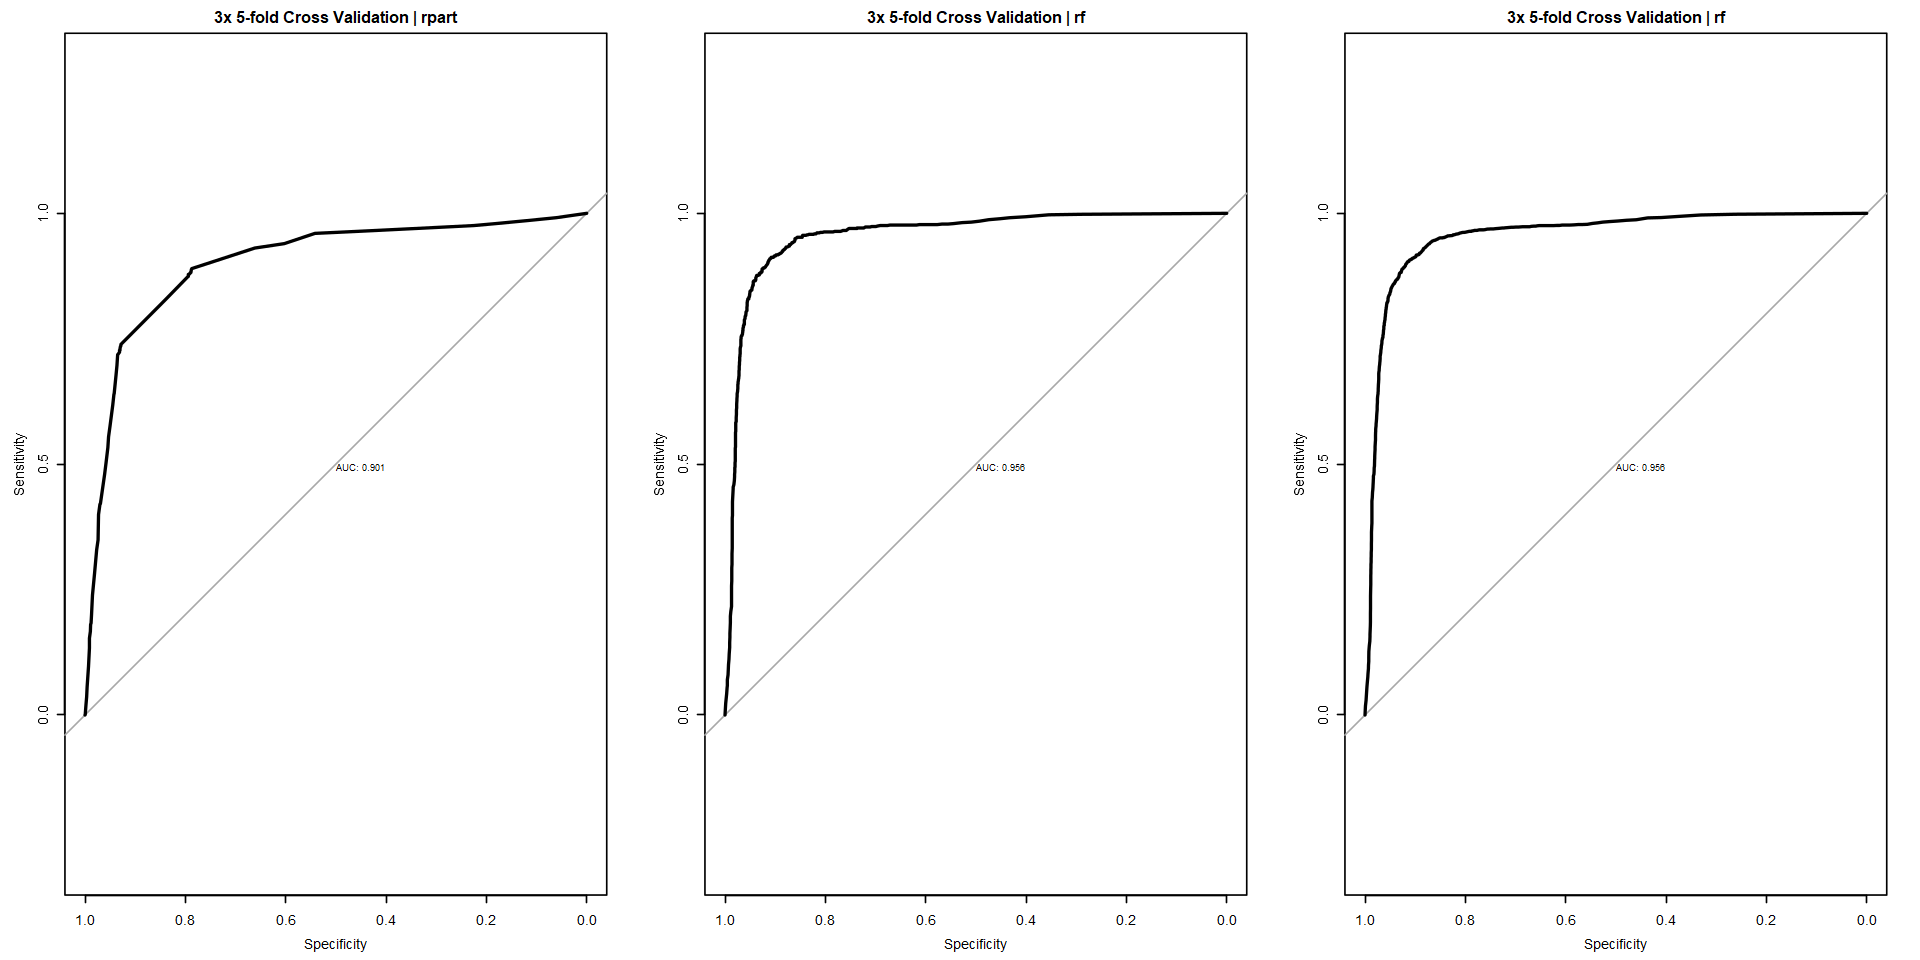

In [33]:
par(mfrow = c(1,3)) 
lapply(fit_models, function(fit) {  
   plot.roc(fit$pred$obs, fit$pred$Retail, 
            main = paste0(control$repeats, "x ", 
                      control$number, "-fold Cross Validation | ", fit$method), 
            print.auc = TRUE)}) 

## Validate the model with the Test set

In [34]:
# Probability Predictions
predictions_prob <- predict(model_rf_tune, test_set, type = "prob")
head(predictions_prob)
# Class Predictions
predictions_raw  <- predict(model_rf_tune, test_set, type = "raw")
head(cbind(predictions_prob, predictions_raw))
# ConfusionMatrix, for evaluating the classification model
confusionMatrix(predictions_raw, test_set$Channel, mode = "everything", positive = 'Horeca')

,Horeca,Retail
,<dbl>,<dbl>
4,0.986,0.014
17,0.080,0.920
29,0.018,0.982
32,0.982,0.018
33,0.994,0.006
39,0.096,0.904


,Horeca,Retail,predictions_raw
,<dbl>,<dbl>,<fct>
4,0.986,0.014,Horeca
17,0.080,0.920,Retail
29,0.018,0.982,Retail
32,0.982,0.018,Horeca
33,0.994,0.006,Horeca
39,0.096,0.904,Retail


Confusion Matrix and Statistics

          Reference
Prediction Horeca Retail
    Horeca     53      1
    Retail      6     27
                                         
               Accuracy : 0.9195         
                 95% CI : (0.8412, 0.967)
    No Information Rate : 0.6782         
    P-Value [Acc > NIR] : 8.147e-08      
                                         
                  Kappa : 0.8239         
                                         
 Mcnemar's Test P-Value : 0.1306         
                                         
            Sensitivity : 0.8983         
            Specificity : 0.9643         
         Pos Pred Value : 0.9815         
         Neg Pred Value : 0.8182         
              Precision : 0.9815         
                 Recall : 0.8983         
                     F1 : 0.9381         
             Prevalence : 0.6782         
         Detection Rate : 0.6092         
   Detection Prevalence : 0.6207         
      Balanced Accuracy : 0.9313

## View the roc curve

Setting levels: control = Horeca, case = Retail

Setting direction: controls < cases



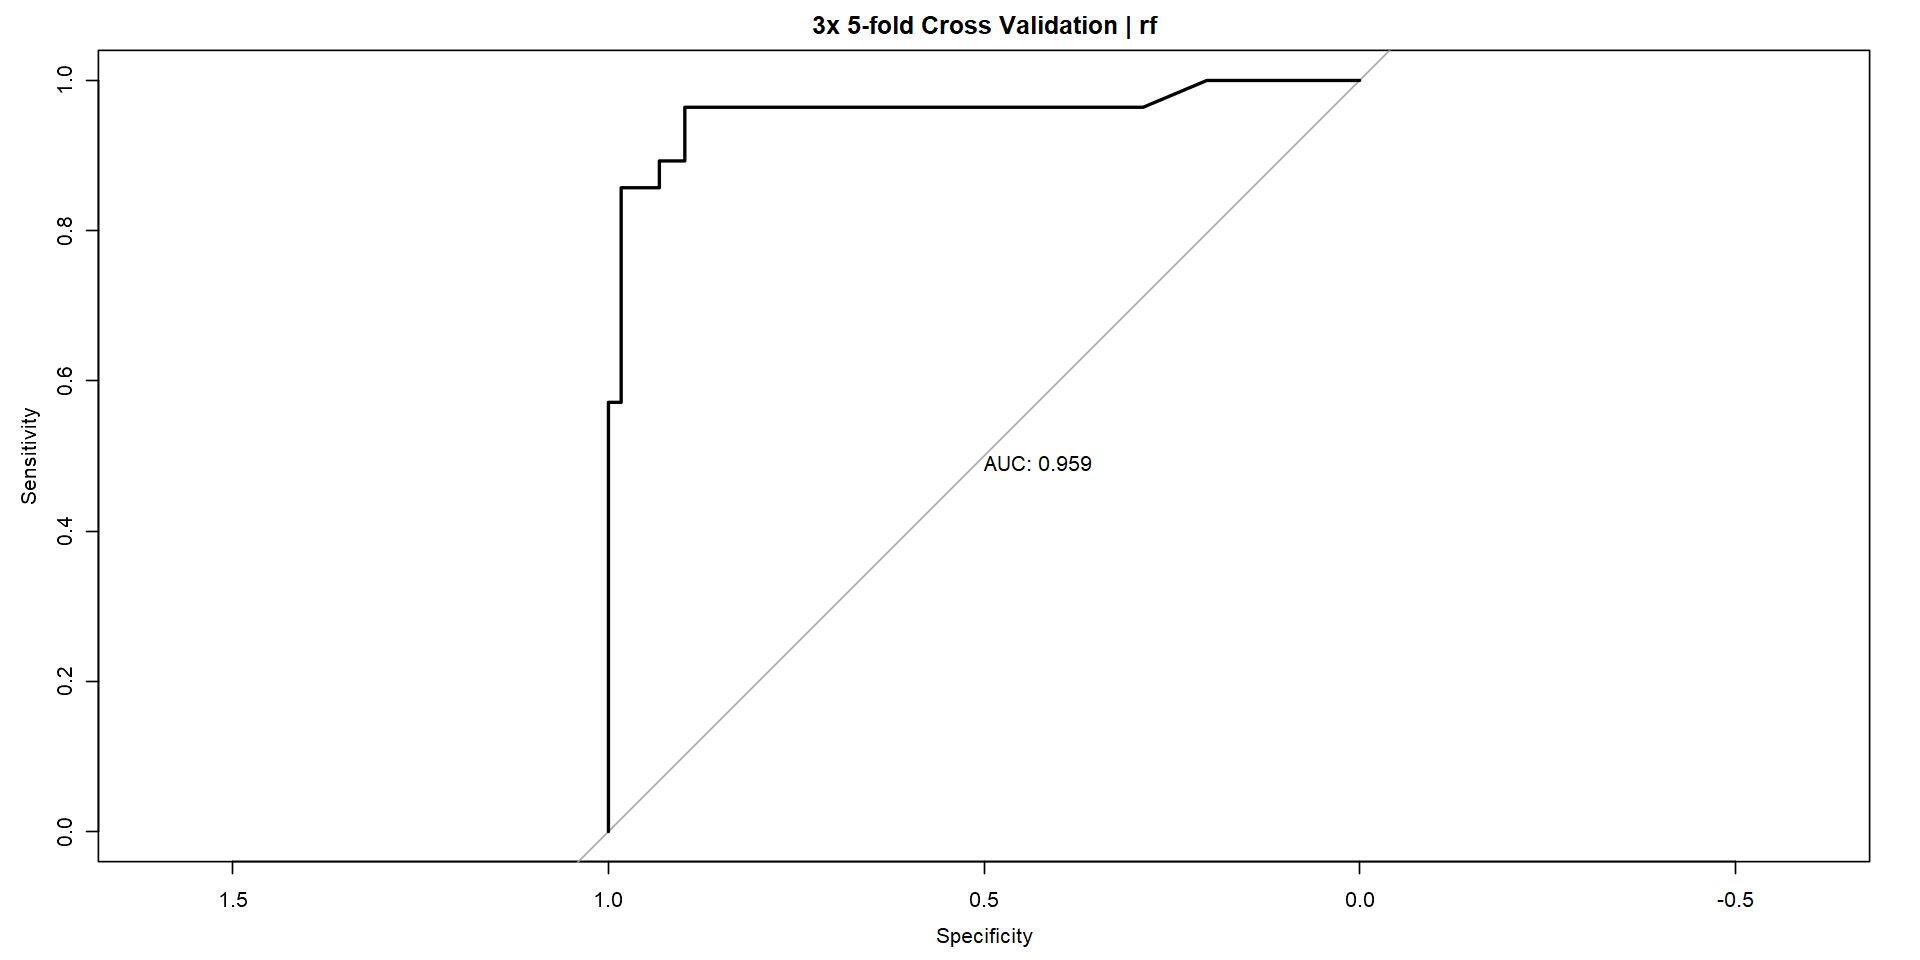

In [35]:
par(mfrow = c(1, 1))
 plot.roc(test_set$Channel,
          predictions_prob$Retail,
          main = paste0(control$repeats, "x ", control$number,
                        "-fold Cross Validation | ", model_rf_tune$method),
          print.auc = TRUE)

AUC as binary classifier:
- with AUC (0.9-1.0) test quality= Excellent (Hanley and McNeil, 1982)
- the AUC detected in the test was 0.959.

## Comment on the results

The model created and used in training served to classify 2 types of customers in Horeca or Retail.

With the best performing model (model_rf_tune), the prediction was made on the test data.

The created model had 53 TP(True positive), 1 FP(false positive), 6 FN(False Negative), 27 TN(True Negative).

Accuracy = (TP+TN)/(TP+TN+FP+FN) = 91.95% - the model correctly predicted the customer 91.95% of the time.

At 95% confidence the accuracy varies between 84.12% and 96.7%.

The Kappa: 0.8239 is considered high, which identifies a good performance of the model and does not hit at random.

Sensitivity= TP/(TP+FN) = 89.83% (TP) corresponding to the correct identification of Horeca customers.

Specificity = TN/(TN+FP) = 96.43% (TN) corresponding to the correct identification of Retail customers.

True Positive Rate (Precision and Recall focus on true positive values)

Precision = TP/(TP+FP) = (true positive rate) 98.15%, the model was correct when it detected the Horeca client.

Recall= TP/(TP+FN) = (true positive rate)- 89.83%, correctly detected Horeca customers.

F1-score= (2* Precision* Recall)/ (Precision + Recall)= 93.81%, statistical measure of performance. (0-1), being close to 1 a good indicator.